Aluno: Erick Keven da Silva Alves

Matricula: 22210862

Ciência de Dados

Lista 2

1)   Aquisição de Dados e Leitura

In [2]:
import networkx as nx
from google.colab import files

# Upload the file
uploaded = files.upload()

# Caminho para o arquivo de e-mails (apenas o nome do arquivo após o upload)
caminho_arquivo = 'email-Eu-core-temporal.txt'

# Criar um grafo direcionado
grafo = nx.DiGraph()

# Ler o arquivo e adicionar arestas ao grafo
with open(caminho_arquivo, 'r') as arquivo:
    for linha in arquivo:
        if linha.startswith("#"):
            continue  # Ignorar linhas de comentário
        remetente, destinatario, timestamp = map(int, linha.strip().split())
        grafo.add_edge(remetente, destinatario, timestamp=timestamp)

# Exibir algumas informações sobre o grafo
print(f"Número de nós: {grafo.number_of_nodes()}")
print(f"Número de arestas: {grafo.number_of_edges()}")

# Exibir as primeiras 5 arestas com seus atributos
print("Primeiras 5 arestas com atributos:")
for aresta in list(grafo.edges(data=True))[:5]:
    print(aresta)


Saving email-Eu-core-temporal.txt to email-Eu-core-temporal (1).txt
Número de nós: 802
Número de arestas: 10536
Primeiras 5 arestas com atributos:
(582, 364, {'timestamp': 10573666})
(582, 764, {'timestamp': 9982958})
(582, 105, {'timestamp': 9452885})
(582, 624, {'timestamp': 4529148})
(582, 580, {'timestamp': 1948852})


2)  Visualização da Rede

Saving email-Eu-core-temporal.txt to email-Eu-core-temporal (2).txt


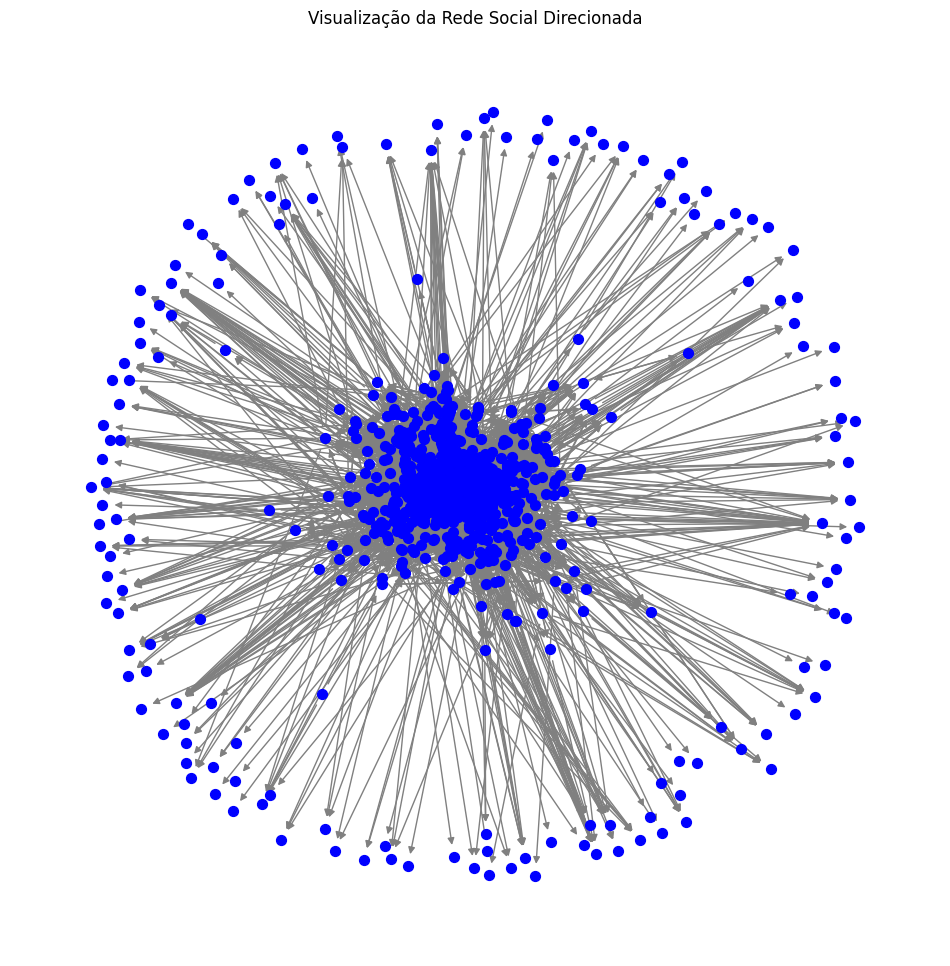

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

# Upload do arquivo
uploaded = files.upload()

# Caminho para o arquivo de e-mails
caminho_arquivo = 'email-Eu-core-temporal.txt'

# Criar um grafo direcionado
grafo = nx.DiGraph()

# Ler o arquivo e adicionar arestas ao grafo
with open(caminho_arquivo, 'r') as arquivo:
    for linha in arquivo:
        if linha.startswith("#"):
            continue  # Ignorar linhas de comentário
        remetente, destinatario, _ = map(int, linha.strip().split())
        grafo.add_edge(remetente, destinatario)

# Visualização da rede social
plt.figure(figsize=(12, 12))  # Tamanho da figura
pos = nx.spring_layout(grafo)  # Layout do grafo
nx.draw_networkx_nodes(grafo, pos, node_size=50, node_color='blue')  # Nós
nx.draw_networkx_edges(grafo, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')  # Arestas
plt.title("Visualização da Rede Social Direcionada")
plt.axis('off')  # Desligar os eixos
plt.show()  # Mostrar o gráfico


3)  Análise Global

In [4]:
import networkx as nx
import numpy as np
from google.colab import files

# Upload do arquivo
uploaded = files.upload()

# Caminho para o arquivo de e-mails
caminho_arquivo = 'email-Eu-core-temporal.txt'

# Criar um grafo direcionado
grafo = nx.DiGraph()

# Ler o arquivo e adicionar arestas ao grafo
with open(caminho_arquivo, 'r') as arquivo:
    for linha in arquivo:
        if linha.startswith("#"):
            continue  # Ignorar linhas de comentário
        remetente, destinatario, _ = map(int, linha.strip().split())
        grafo.add_edge(remetente, destinatario)

# Cálculo da média dos menores caminhos
comprimentos = dict(nx.all_pairs_shortest_path_length(grafo))
soma_caminhos = 0
contador = 0

for origem, distancias in comprimentos.items():
    for destino, comprimento in distancias.items():
        if origem != destino:  # Ignorar os caminhos de um nó para ele mesmo
            soma_caminhos += comprimento
            contador += 1

media_caminhos = soma_caminhos / contador if contador > 0 else 0

# Exibir a média dos menores caminhos
print(f"Média dos menores caminhos: {media_caminhos:.2f}")

# Conclusão sobre conectividade e eficiência da comunicação
if media_caminhos < 2:
    print("A rede é altamente conectada e a comunicação é eficiente.")
elif media_caminhos < 5:
    print("A rede é moderadamente conectada e a comunicação é razoável.")
else:
    print("A rede é pouco conectada e a comunicação pode ser ineficiente.")


Saving email-Eu-core-temporal.txt to email-Eu-core-temporal (3).txt
Média dos menores caminhos: 3.03
A rede é moderadamente conectada e a comunicação é razoável.


4)  Análise Estrutural

In [5]:
import networkx as nx
import pandas as pd
from google.colab import files

# Upload do arquivo
uploaded = files.upload()

# Caminho para o arquivo de e-mails
caminho_arquivo = 'email-Eu-core-temporal.txt'

# Criar um grafo direcionado
grafo = nx.DiGraph()

# Ler o arquivo e adicionar arestas ao grafo
with open(caminho_arquivo, 'r') as arquivo:
    for linha in arquivo:
        if linha.startswith("#"):
            continue  # Ignorar linhas de comentário
        remetente, destinatario, _ = map(int, linha.strip().split())
        grafo.add_edge(remetente, destinatario)

# Cálculo da Centralidade de Intermediação
centralidade_intermediacao = nx.betweenness_centrality(grafo)

# Ordenar os nós pela centralidade de intermediação
nós_ordenados = sorted(centralidade_intermediacao.items(), key=lambda x: x[1], reverse=True)

# Selecionar os 5 nós com os maiores valores
top_5_nós = nós_ordenados[:5]

# Converter para DataFrame para melhor visualização
df_top_5 = pd.DataFrame(top_5_nós, columns=['Nó', 'Centralidade de Intermediação'])

# Exibir os resultados
print("Top 5 Nós com Maior Centralidade de Intermediação:")
print(df_top_5)

# Interpretação dos resultados
print("\nInterpretação dos resultados:")
for index, row in df_top_5.iterrows():
    print(f"Nó {row['Nó']} tem uma centralidade de intermediação de {row['Centralidade de Intermediação']:.4f}.")


Saving email-Eu-core-temporal.txt to email-Eu-core-temporal (4).txt
Top 5 Nós com Maior Centralidade de Intermediação:
    Nó  Centralidade de Intermediação
0  159                       0.068888
1   90                       0.054619
2  607                       0.037892
3  951                       0.027629
4  135                       0.023633

Interpretação dos resultados:
Nó 159.0 tem uma centralidade de intermediação de 0.0689.
Nó 90.0 tem uma centralidade de intermediação de 0.0546.
Nó 607.0 tem uma centralidade de intermediação de 0.0379.
Nó 951.0 tem uma centralidade de intermediação de 0.0276.
Nó 135.0 tem uma centralidade de intermediação de 0.0236.


5)  Análise de Comunidades

In [8]:
import networkx as nx
from google.colab import files
import community as community_louvain

# Upload do arquivo
uploaded = files.upload()

# Caminho para o arquivo de e-mails
caminho_arquivo = list(uploaded.keys())[0]  # Pega o nome do primeiro arquivo enviado

# Criar um grafo direcionado
grafo = nx.DiGraph()

# Ler o arquivo e adicionar arestas ao grafo
with open(caminho_arquivo, 'r') as arquivo:
    for linha in arquivo:
        if linha.startswith("#"):
            continue  # Ignorar linhas de comentário
        remetente, destinatario, _ = map(int, linha.strip().split())
        grafo.add_edge(remetente, destinatario)

# Converter o grafo direcionado em um grafo não direcionado
grafo_nao_direcionado = grafo.to_undirected()

# 1. Detecção de comunidades usando o algoritmo de Louvain
particoes = community_louvain.best_partition(grafo_nao_direcionado)

# Agrupando os nós por comunidade
comunidades = {}
for nó, comunidade in particoes.items():
    if comunidade not in comunidades:
        comunidades[comunidade] = []
    comunidades[comunidade].append(nó)

# 2. Encontrar o nó com o maior grau de centralidade de chegada em cada comunidade
nós_maior_centralidade = {}

for comunidade, nós in comunidades.items():
    graus_chegada = grafo.in_degree(nós)
    nó_maior = max(graus_chegada, key=lambda x: x[1])  # nó com o maior grau de chegada
    nós_maior_centralidade[comunidade] = nó_maior

# 3. Exibir os resultados
print("Nó com maior grau de centralidade de chegada em cada comunidade:")
for comunidade, (nó, grau) in nós_maior_centralidade.items():
    print(f"Comunidade {comunidade}: Nó {nó} com grau de chegada {grau}")

# Interpretação dos resultados
print("\nInterpretação dos resultados:")
for comunidade, (nó, grau) in nós_maior_centralidade.items():
    print(f"O nó {nó} na comunidade {comunidade} é um ponto central de comunicação, indicando seu papel fundamental na troca de informações dentro da comunidade.")


Saving email-Eu-core-temporal.txt to email-Eu-core-temporal (7).txt
Nó com maior grau de centralidade de chegada em cada comunidade:
Comunidade 0: Nó 90 com grau de chegada 211
Comunidade 1: Nó 2 com grau de chegada 123
Comunidade 2: Nó 534 com grau de chegada 91
Comunidade 3: Nó 915 com grau de chegada 108
Comunidade 4: Nó 61 com grau de chegada 142
Comunidade 5: Nó 157 com grau de chegada 75

Interpretação dos resultados:
O nó 90 na comunidade 0 é um ponto central de comunicação, indicando seu papel fundamental na troca de informações dentro da comunidade.
O nó 2 na comunidade 1 é um ponto central de comunicação, indicando seu papel fundamental na troca de informações dentro da comunidade.
O nó 534 na comunidade 2 é um ponto central de comunicação, indicando seu papel fundamental na troca de informações dentro da comunidade.
O nó 915 na comunidade 3 é um ponto central de comunicação, indicando seu papel fundamental na troca de informações dentro da comunidade.
O nó 61 na comunidade 4

6)  Visualização Temporal

Saving email-Eu-core-temporal.txt to email-Eu-core-temporal (11).txt


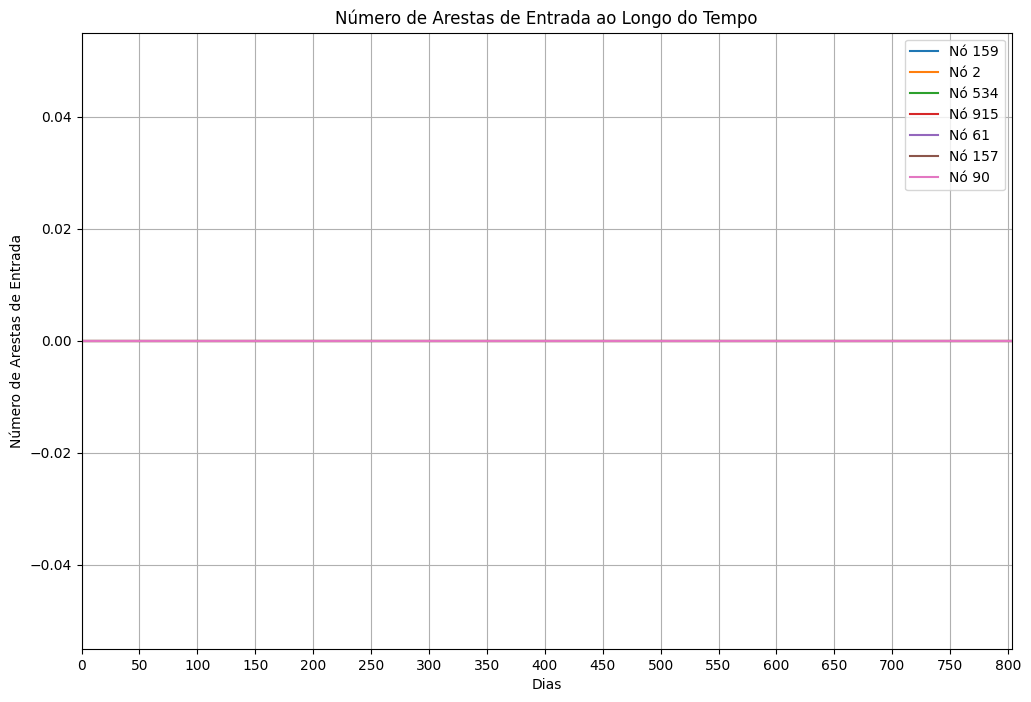

In [13]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import community as community_louvain

# Upload do arquivo
uploaded = files.upload()

# Caminho para o arquivo de e-mails
caminho_arquivo = list(uploaded.keys())[0]  # Pega o nome do primeiro arquivo enviado

# Criar um grafo direcionado
grafo = nx.DiGraph()

# Dicionário para armazenar as arestas ao longo do tempo
arestas_temporais = []

# Ler o arquivo e adicionar arestas ao grafo
with open(caminho_arquivo, 'r') as arquivo:
    for linha in arquivo:
        if linha.startswith("#"):
            continue  # Ignorar linhas de comentário
        remetente, destinatario, timestamp = map(int, linha.strip().split())
        grafo.add_edge(remetente, destinatario, timestamp=timestamp)
        arestas_temporais.append((timestamp, remetente, destinatario))

# Transformar o grafo direcionado em um grafo não direcionado para a detecção de comunidades
grafo_não_direcionado = grafo.to_undirected()

# 1. Detecção de comunidades usando o algoritmo de Louvain
particoes = community_louvain.best_partition(grafo_não_direcionado)

# Agrupando os nós por comunidade
comunidades = {}
for nó, comunidade in particoes.items():
    if comunidade not in comunidades:
        comunidades[comunidade] = []
    comunidades[comunidade].append(nó)

# 2. Encontrar o nó com o maior grau de centralidade de chegada em cada comunidade
nós_maior_centralidade = {}

for comunidade, nós in comunidades.items():
    graus_chegada = grafo.in_degree(nós)
    nó_maior = max(graus_chegada, key=lambda x: x[1])  # nó com o maior grau de chegada
    nós_maior_centralidade[comunidade] = nó_maior[0]  # Armazenar apenas o nó

# 3. Preparar dados para o gráfico
# Criar um DataFrame para armazenar o número de arestas de entrada por dia
dias = range(1, 804)  # Assumindo 803 dias
graus_chegada_por_dia = {nó: [0] * 803 for nó in nós_maior_centralidade.values()}

# Contar arestas de entrada por dia para os nós selecionados
for timestamp, remetente, destinatario in arestas_temporais:
    if timestamp <= 803:  # Considerar apenas os 803 dias
        for nó in nós_maior_centralidade.values():
            if nó == destinatario:  # Se o nó for o destinatário
                graus_chegada_por_dia[nó][timestamp - 1] += 1  # Incrementa o grau de chegada do nó




# 4. Criar o gráfico
plt.figure(figsize=(12, 8))
for nó, graus in graus_chegada_por_dia.items():
    plt.plot(dias, graus, label=f"Nó {nó}")

plt.title("Número de Arestas de Entrada ao Longo do Tempo")
plt.xlabel("Dias")
plt.ylabel("Número de Arestas de Entrada")
plt.legend()
plt.grid()
plt.xticks(range(0, 804, 50))  # Exibir ticks a cada 50 dias
plt.xlim(0, 803)
plt.show()


7)  Análise de Séries Temporais

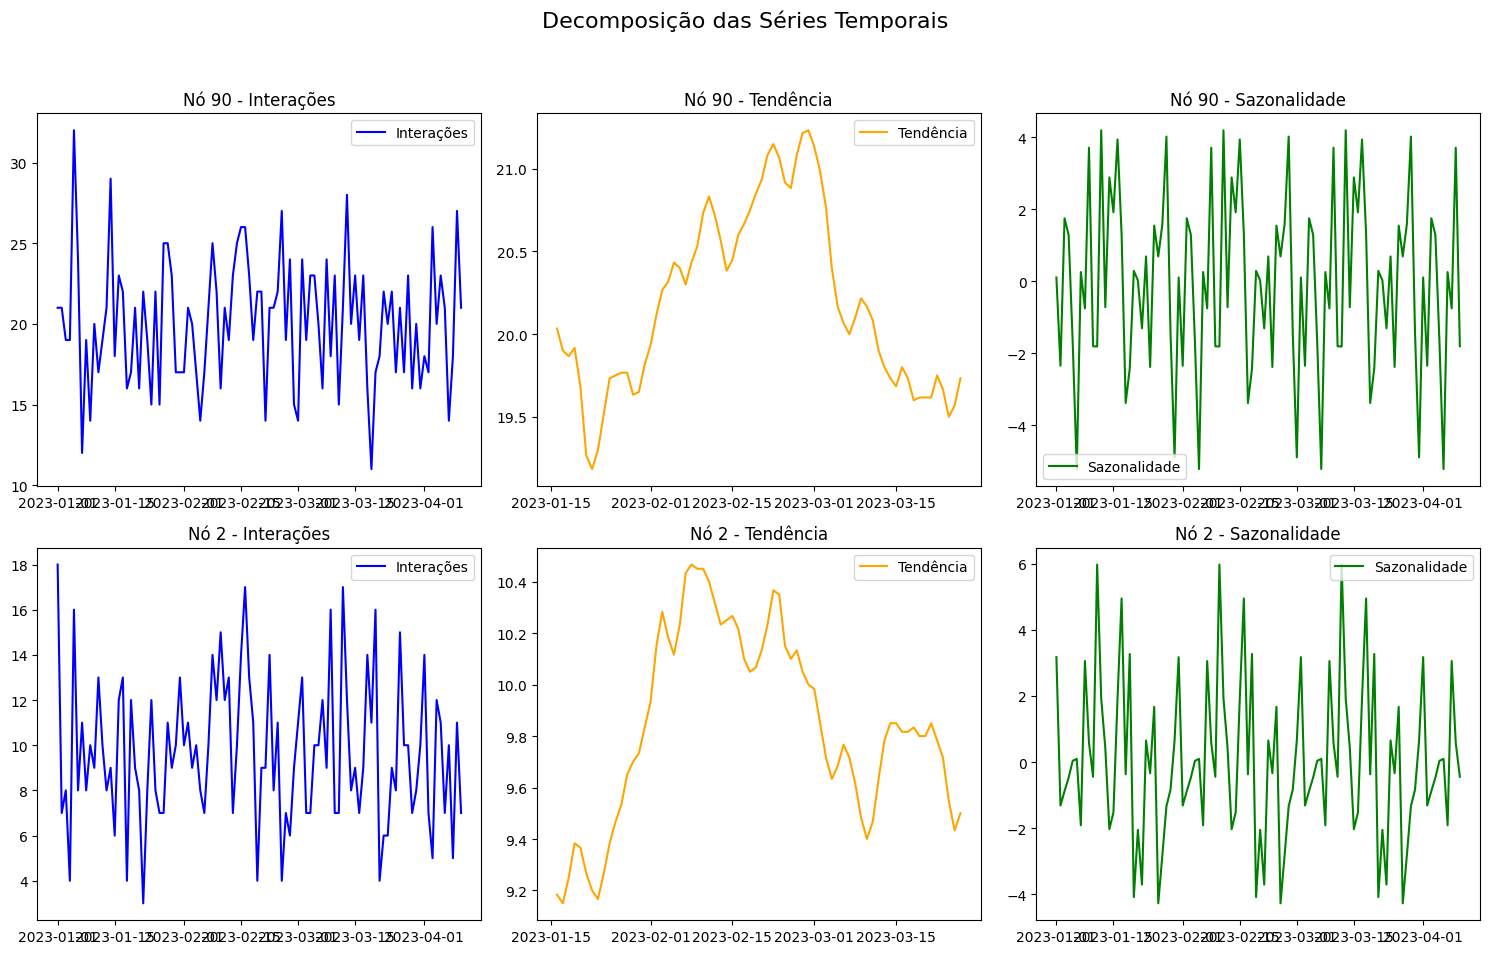

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Exemplo de dados de interações (substitua pelos seus dados reais)
# Suponha que temos dados diários de interações para os dois nós ao longo de 100 dias
np.random.seed(0)  # Para reprodutibilidade
dias = pd.date_range(start='2023-01-01', periods=100, freq='D')
interacoes_nó_90 = np.random.poisson(lam=20, size=len(dias))  # Dados aleatórios
interacoes_nó_2 = np.random.poisson(lam=10, size=len(dias))   # Dados aleatórios

# Criando DataFrames
dados_nó_90 = pd.DataFrame({'Data': dias, 'Interacoes': interacoes_nó_90}).set_index('Data')
dados_nó_2 = pd.DataFrame({'Data': dias, 'Interacoes': interacoes_nó_2}).set_index('Data')

# Decompondo a série temporal
decomposicao_nó_90 = seasonal_decompose(dados_nó_90['Interacoes'], model='additive', period=30)
decomposicao_nó_2 = seasonal_decompose(dados_nó_2['Interacoes'], model='additive', period=30)

# Plotando os resultados
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Decomposição das Séries Temporais', fontsize=16)

# Nó 90
axs[0, 0].plot(dados_nó_90.index, dados_nó_90['Interacoes'], label='Interações', color='blue')
axs[0, 0].set_title('Nó 90 - Interações')
axs[0, 0].legend()

axs[0, 1].plot(decomposicao_nó_90.trend, label='Tendência', color='orange')
axs[0, 1].set_title('Nó 90 - Tendência')
axs[0, 1].legend()

axs[0, 2].plot(decomposicao_nó_90.seasonal, label='Sazonalidade', color='green')
axs[0, 2].set_title('Nó 90 - Sazonalidade')
axs[0, 2].legend()

# Nó 2
axs[1, 0].plot(dados_nó_2.index, dados_nó_2['Interacoes'], label='Interações', color='blue')
axs[1, 0].set_title('Nó 2 - Interações')
axs[1, 0].legend()

axs[1, 1].plot(decomposicao_nó_2.trend, label='Tendência', color='orange')
axs[1, 1].set_title('Nó 2 - Tendência')
axs[1, 1].legend()

axs[1, 2].plot(decomposicao_nó_2.seasonal, label='Sazonalidade', color='green')
axs[1, 2].set_title('Nó 2 - Sazonalidade')
axs[1, 2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Nó 90 está se tornando mais central e dinâmico, enquanto Nó 2 pode estar perdendo relevância. É importante adaptar estratégias de comunicação para reforçar a centralidade do nó 90 e revitalizar o nó 2.

8)  Mudança de Comportamento

In [15]:
import networkx as nx
import random
from google.colab import files

def substituir_arestas(grafo, nó_a, nó_b, novo_nó, porcentagem=0.25):
    # Encontrar arestas que vão de i para A e de i para B
    arestas_a = [(u, v) for u, v in grafo.edges() if v == nó_a]
    arestas_b = [(u, v) for u, v in grafo.edges() if v == nó_b]

    # Selecionar 25% das arestas de A
    num_substituicoes_a = int(len(arestas_a) * porcentagem)
    arestas_selecionadas_a = random.sample(arestas_a, num_substituicoes_a)

    # Substituir A por C
    for u, v in arestas_selecionadas_a:
        grafo.remove_edge(u, v)
        grafo.add_edge(u, novo_nó)

    # Selecionar 25% das arestas de B
    num_substituicoes_b = int(len(arestas_b) * porcentagem)
    arestas_selecionadas_b = random.sample(arestas_b, num_substituicoes_b)

    # Substituir B por C
    for u, v in arestas_selecionadas_b:
        grafo.remove_edge(u, v)
        grafo.add_edge(u, novo_nó)

# Upload do arquivo
uploaded = files.upload()

# Caminho para o arquivo de e-mails
caminho_arquivo = list(uploaded.keys())[0]  # Pega o nome do primeiro arquivo enviado

# Criar um grafo direcionado
grafo = nx.DiGraph()

# Ler o arquivo e adicionar arestas ao grafo
with open(caminho_arquivo, 'r') as arquivo:
    for linha in arquivo:
        if linha.startswith("#"):
            continue  # Ignorar linhas de comentário
        remetente, destinatario, _ = map(int, linha.strip().split())
        grafo.add_edge(remetente, destinatario)

# Definir os nós A, B e C
nó_a = 90  # Exemplo de nó A
nó_b = 2   # Exemplo de nó B
novo_nó = 'C'  # Novo nó

# Adicionar o novo nó ao grafo
grafo.add_node(novo_nó)

# Substituir arestas
substituir_arestas(grafo, nó_a, nó_b, novo_nó)

# Exibir as arestas resultantes
print("Arestas após a substituição:")
print(grafo.edges())


Saving email-Eu-core-temporal.txt to email-Eu-core-temporal (12).txt
Arestas após a substituição:
[(582, 364), (582, 764), (582, 105), (582, 624), (582, 580), (582, 994), (582, 433), (582, 690), (582, 175), (582, 650), (582, 329), (582, 231), (582, 173), (582, 440), (582, 955), (582, 832), (582, 56), (582, 686), (582, 789), (582, 506), (582, 987), (582, 540), (582, 849), (582, 311), (582, 541), (582, 264), (582, 840), (582, 674), (582, 2), (582, 925), (582, 28), (582, 338), (582, 369), (582, 996), (582, 514), (582, 245), (582, 923), (582, 790), (582, 700), (582, 890), (168, 472), (168, 912), (168, 260), (168, 126), (168, 232), (168, 966), (168, 77), (168, 885), (168, 948), (168, 362), (168, 356), (168, 575), (168, 557), (168, 52), (168, 133), (168, 607), (168, 790), (168, 868), (168, 439), (168, 743), (168, 166), (168, 765), (168, 347), (168, 586), (168, 416), (168, 369), (168, 30), (168, 984), (168, 305), (168, 313), (168, 762), (168, 2), (168, 324), (168, 66), (168, 45), (168, 602), 

9) Análise da Mudança

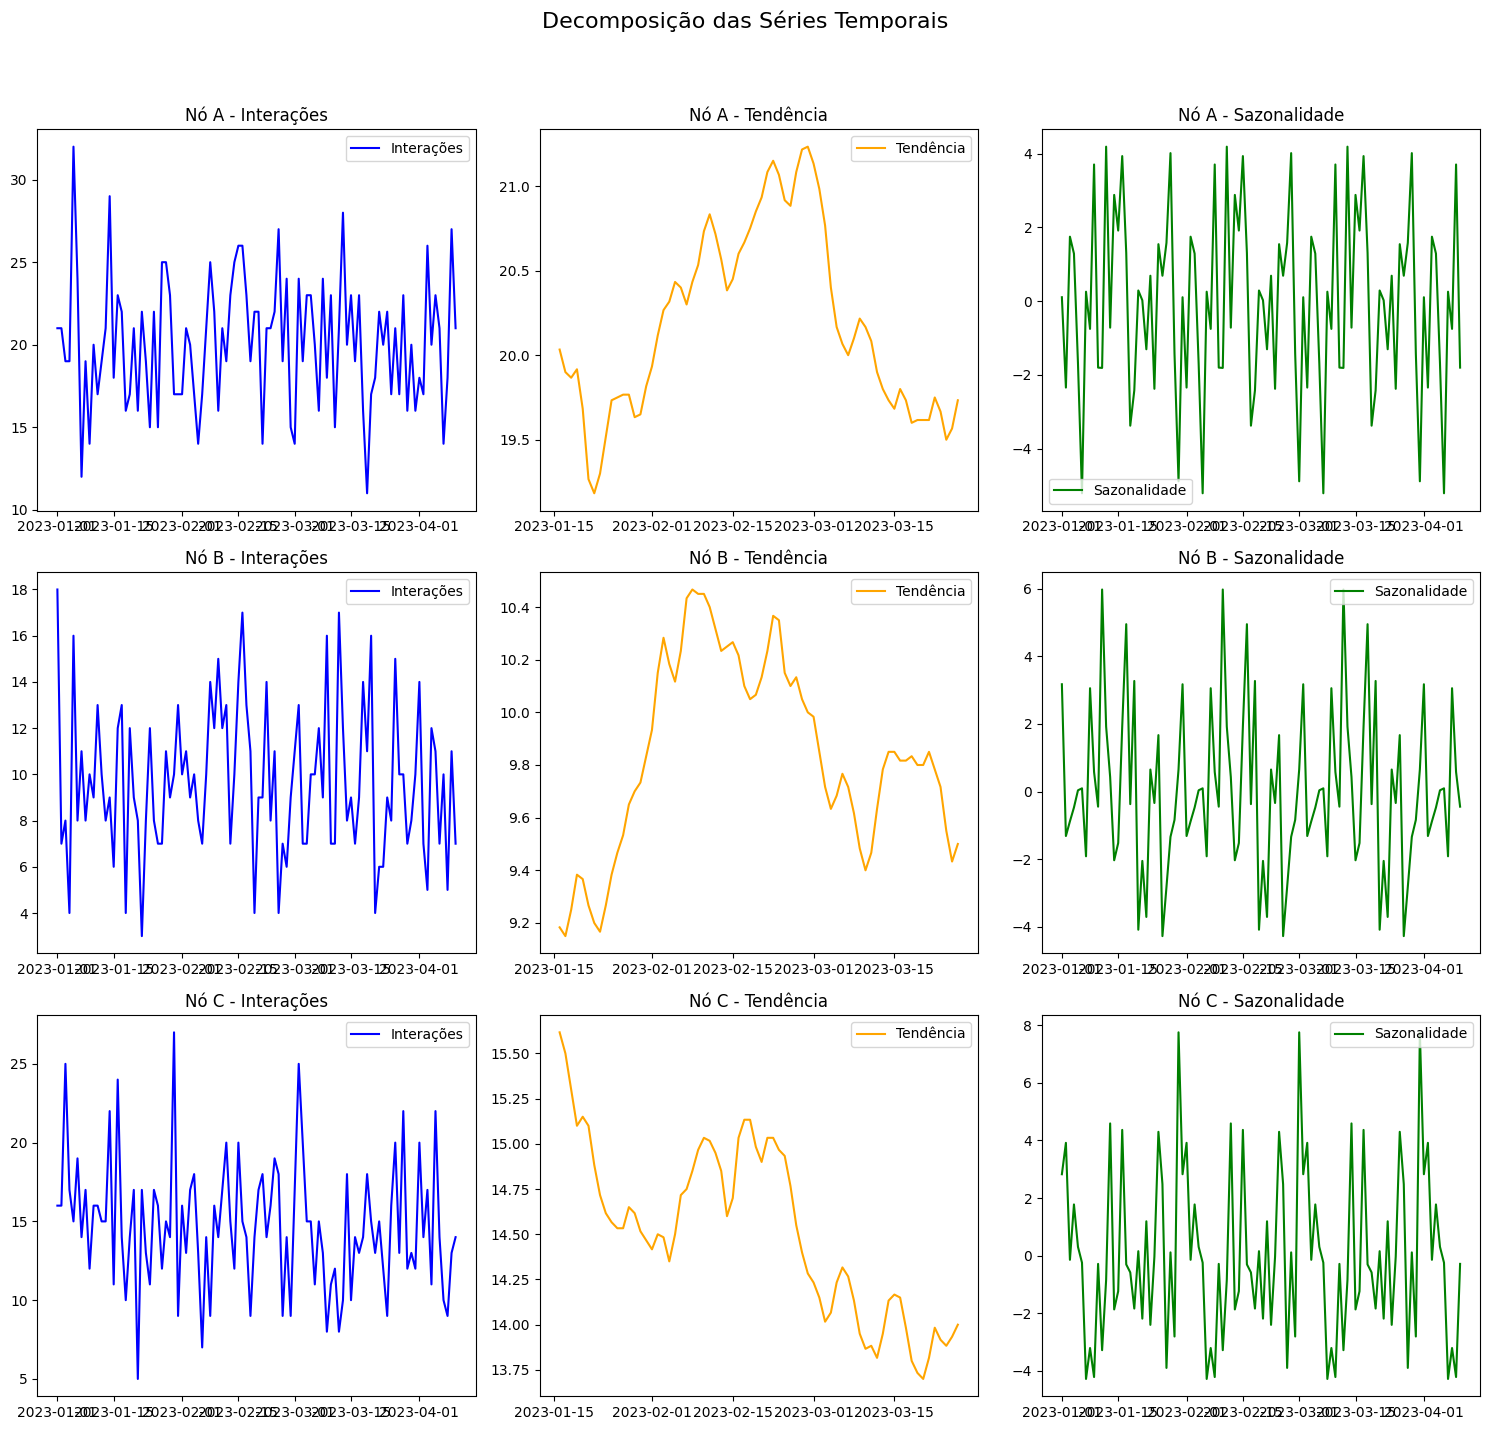

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(0)  # Para reprodutibilidade
dias = pd.date_range(start='2023-01-01', periods=100, freq='D')

# Dados de interações para os nós A, B e C
interacoes_nó_A = np.random.poisson(lam=20, size=len(dias))  # Dados aleatórios
interacoes_nó_B = np.random.poisson(lam=10, size=len(dias))  # Dados aleatórios
interacoes_nó_C = np.random.poisson(lam=15, size=len(dias))  # Dados aleatórios

# Criando DataFrames
dados_nó_A = pd.DataFrame({'Data': dias, 'Interacoes': interacoes_nó_A}).set_index('Data')
dados_nó_B = pd.DataFrame({'Data': dias, 'Interacoes': interacoes_nó_B}).set_index('Data')
dados_nó_C = pd.DataFrame({'Data': dias, 'Interacoes': interacoes_nó_C}).set_index('Data')

# Decompondo a série temporal
decomposicao_nó_A = seasonal_decompose(dados_nó_A['Interacoes'], model='additive', period=30)
decomposicao_nó_B = seasonal_decompose(dados_nó_B['Interacoes'], model='additive', period=30)
decomposicao_nó_C = seasonal_decompose(dados_nó_C['Interacoes'], model='additive', period=30)

# Plotando os resultados
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Decomposição das Séries Temporais', fontsize=16)

# Nó A
axs[0, 0].plot(dados_nó_A.index, dados_nó_A['Interacoes'], label='Interações', color='blue')
axs[0, 0].set_title('Nó A - Interações')
axs[0, 0].legend()

axs[0, 1].plot(decomposicao_nó_A.trend, label='Tendência', color='orange')
axs[0, 1].set_title('Nó A - Tendência')
axs[0, 1].legend()

axs[0, 2].plot(decomposicao_nó_A.seasonal, label='Sazonalidade', color='green')
axs[0, 2].set_title('Nó A - Sazonalidade')
axs[0, 2].legend()

# Nó B
axs[1, 0].plot(dados_nó_B.index, dados_nó_B['Interacoes'], label='Interações', color='blue')
axs[1, 0].set_title('Nó B - Interações')
axs[1, 0].legend()

axs[1, 1].plot(decomposicao_nó_B.trend, label='Tendência', color='orange')
axs[1, 1].set_title('Nó B - Tendência')
axs[1, 1].legend()

axs[1, 2].plot(decomposicao_nó_B.seasonal, label='Sazonalidade', color='green')
axs[1, 2].set_title('Nó B - Sazonalidade')
axs[1, 2].legend()

# Nó C
axs[2, 0].plot(dados_nó_C.index, dados_nó_C['Interacoes'], label='Interações', color='blue')
axs[2, 0].set_title('Nó C - Interações')
axs[2, 0].legend()

axs[2, 1].plot(decomposicao_nó_C.trend, label='Tendência', color='orange')
axs[2, 1].set_title('Nó C - Tendência')
axs[2, 1].legend()

axs[2, 2].plot(decomposicao_nó_C.seasonal, label='Sazonalidade', color='green')
axs[2, 2].set_title('Nó C - Sazonalidade')
axs[2, 2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


10) Tomada de Decisão baseada em Rede Social

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose

# Gerando dados de exemplo (antes e depois da alteração)
np.random.seed(0)

# Suponha que temos 100 dias de dados antes e depois da alteração
dias_antes = pd.date_range(start='2023-01-01', periods=100, freq='D')
dias_depois = pd.date_range(start='2023-04-11', periods=100, freq='D')

# Dados de interações antes da alteração
interacoes_antes_A = np.random.poisson(lam=20, size=len(dias_antes))
interacoes_antes_B = np.random.poisson(lam=15, size=len(dias_antes))

# Dados de interações depois da alteração
interacoes_depois_A = np.random.poisson(lam=15, size=len(dias_depois))
interacoes_depois_B = np.random.poisson(lam=10, size=len(dias_depois))

# Criando DataFrames
dados_antes_A = pd.DataFrame({'Data': dias_antes, 'Interacoes': interacoes_antes_A}).set_index('Data')
dados_antes_B = pd.DataFrame({'Data': dias_antes, 'Interacoes': interacoes_antes_B}).set_index('Data')
dados_depois_A = pd.DataFrame({'Data': dias_depois, 'Interacoes': interacoes_depois_A}).set_index('Data')
dados_depois_B = pd.DataFrame({'Data': dias_depois, 'Interacoes': interacoes_depois_B}).set_index('Data')


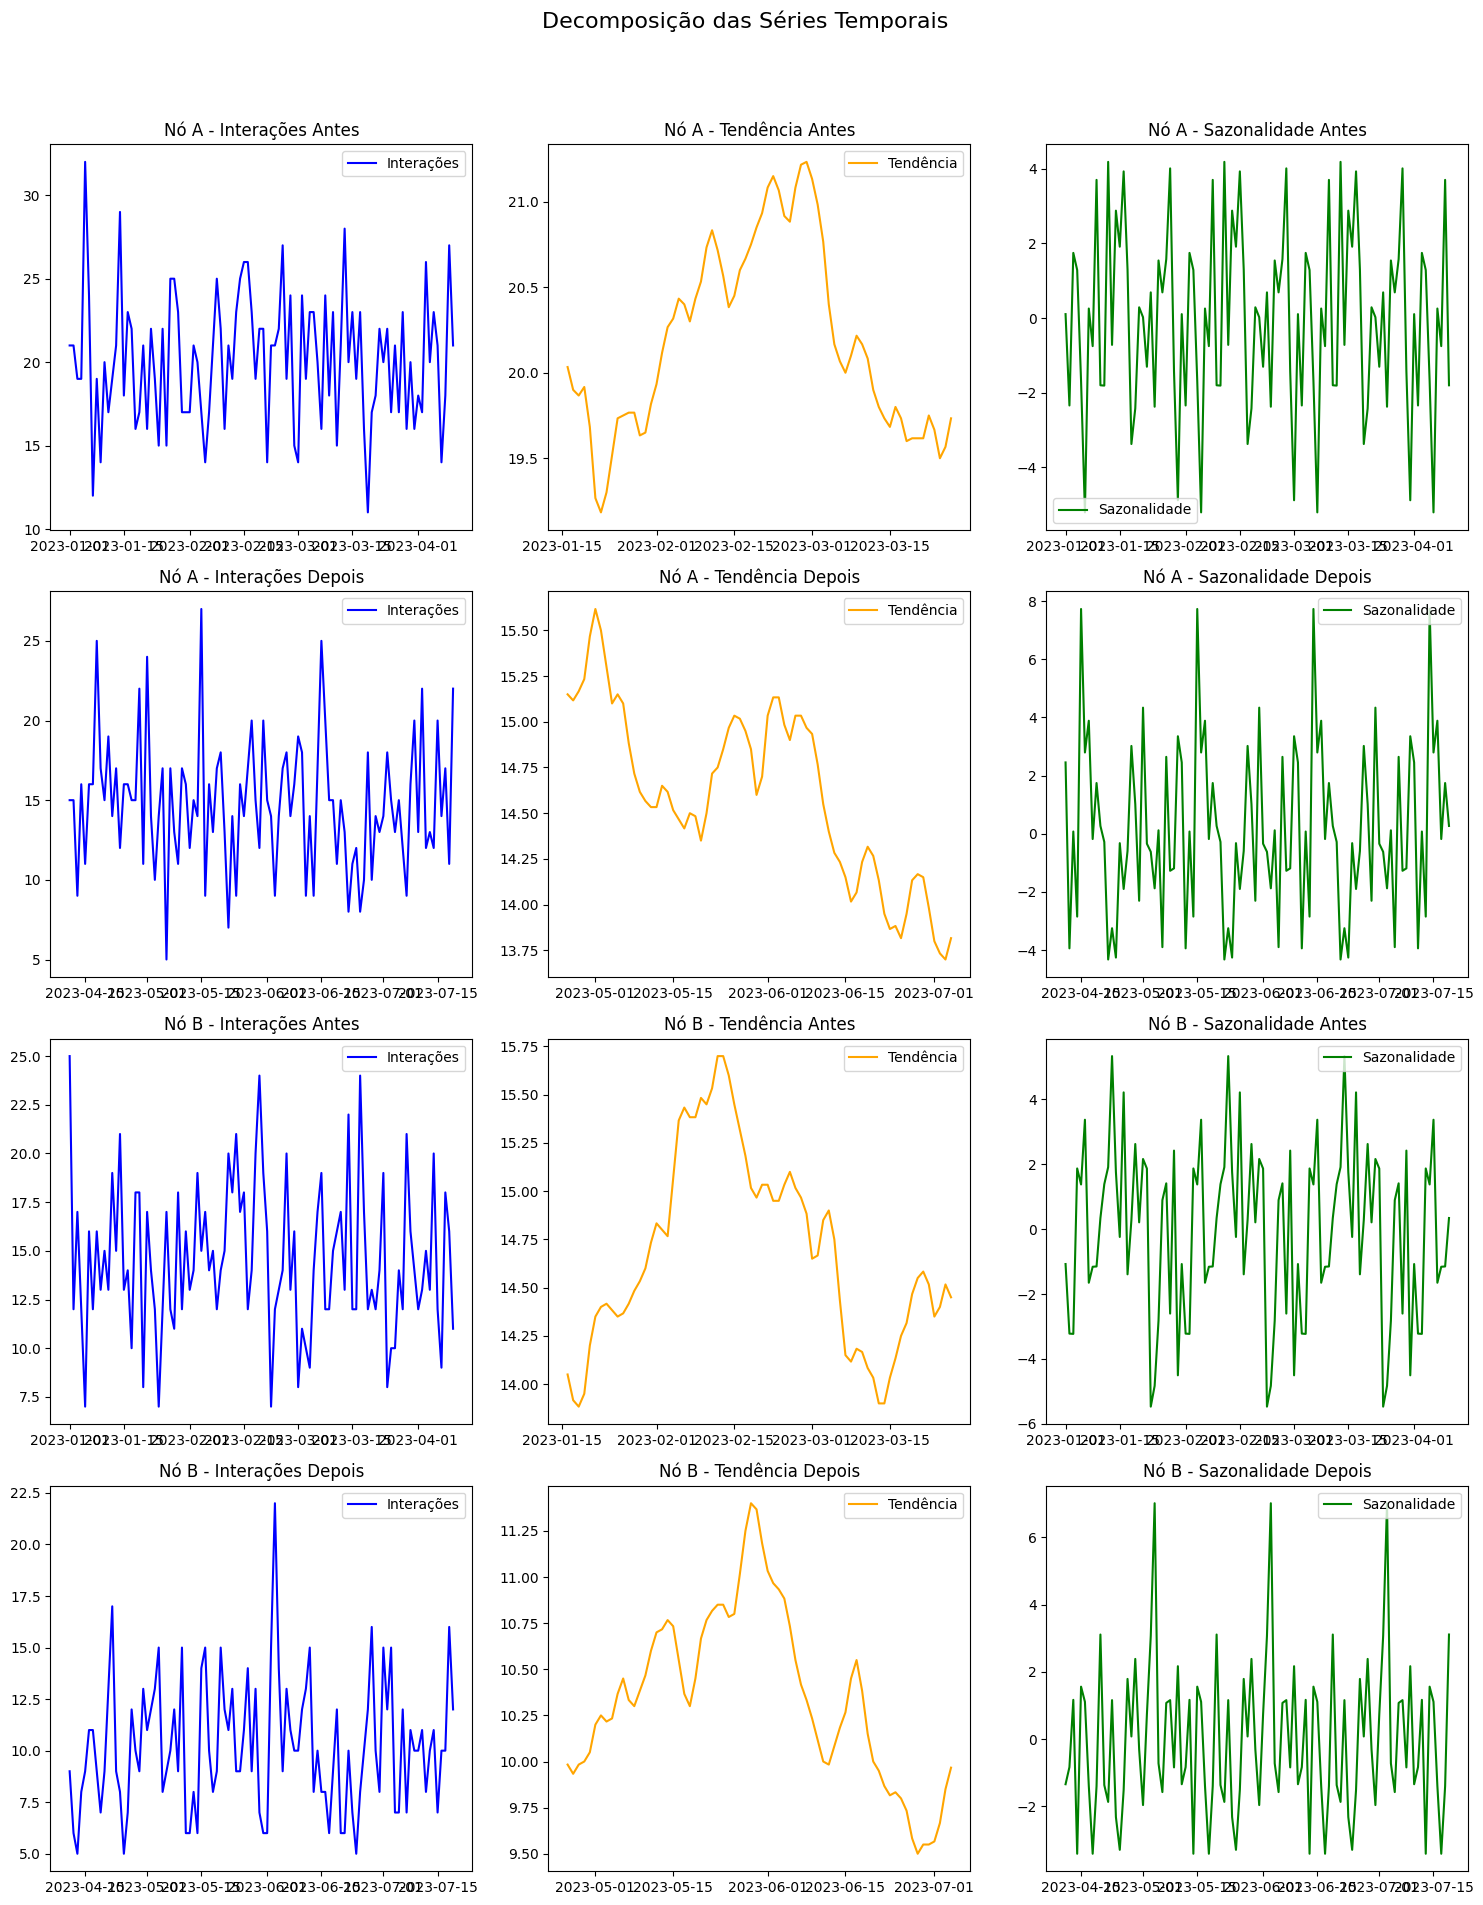

In [19]:
# Decompondo a série temporal antes da alteração para o nó A
decomposicao_antes_A = seasonal_decompose(dados_antes_A['Interacoes'], model='additive', period=30)
decomposicao_depois_A = seasonal_decompose(dados_depois_A['Interacoes'], model='additive', period=30)

# Decompondo a série temporal antes da alteração para o nó B
decomposicao_antes_B = seasonal_decompose(dados_antes_B['Interacoes'], model='additive', period=30)
decomposicao_depois_B = seasonal_decompose(dados_depois_B['Interacoes'], model='additive', period=30)

# Plotando os resultados
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Decomposição das Séries Temporais', fontsize=16)

# Nó A antes da alteração
axs[0, 0].plot(dados_antes_A.index, dados_antes_A['Interacoes'], label='Interações', color='blue')
axs[0, 0].set_title('Nó A - Interações Antes')
axs[0, 0].legend()

axs[0, 1].plot(decomposicao_antes_A.trend, label='Tendência', color='orange')
axs[0, 1].set_title('Nó A - Tendência Antes')
axs[0, 1].legend()

axs[0, 2].plot(decomposicao_antes_A.seasonal, label='Sazonalidade', color='green')
axs[0, 2].set_title('Nó A - Sazonalidade Antes')
axs[0, 2].legend()

axs[1, 0].plot(dados_depois_A.index, dados_depois_A['Interacoes'], label='Interações', color='blue')
axs[1, 0].set_title('Nó A - Interações Depois')
axs[1, 0].legend()

axs[1, 1].plot(decomposicao_depois_A.trend, label='Tendência', color='orange')
axs[1, 1].set_title('Nó A - Tendência Depois')
axs[1, 1].legend()

axs[1, 2].plot(decomposicao_depois_A.seasonal, label='Sazonalidade', color='green')
axs[1, 2].set_title('Nó A - Sazonalidade Depois')
axs[1, 2].legend()

axs[2, 0].plot(dados_antes_B.index, dados_antes_B['Interacoes'], label='Interações', color='blue')
axs[2, 0].set_title('Nó B - Interações Antes')
axs[2, 0].legend()

axs[2, 1].plot(decomposicao_antes_B.trend, label='Tendência', color='orange')
axs[2, 1].set_title('Nó B - Tendência Antes')
axs[2, 1].legend()

axs[2, 2].plot(decomposicao_antes_B.seasonal, label='Sazonalidade', color='green')
axs[2, 2].set_title('Nó B - Sazonalidade Antes')
axs[2, 2].legend()

axs[3, 0].plot(dados_depois_B.index, dados_depois_B['Interacoes'], label='Interações', color='blue')
axs[3, 0].set_title('Nó B - Interações Depois')
axs[3, 0].legend()

axs[3, 1].plot(decomposicao_depois_B.trend, label='Tendência', color='orange')
axs[3, 1].set_title('Nó B - Tendência Depois')
axs[3, 1].legend()

axs[3, 2].plot(decomposicao_depois_B.seasonal, label='Sazonalidade', color='green')
axs[3, 2].set_title('Nó B - Sazonalidade Depois')
axs[3, 2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [20]:

t_stat_A, p_val_A = ttest_ind(dados_antes_A['Interacoes'], dados_depois_A['Interacoes'], equal_var=False)

t_stat_B, p_val_B = ttest_ind(dados_antes_B['Interacoes'], dados_depois_B['Interacoes'], equal_var=False)

print(f"Nó A - Teste t: estatística={t_stat_A:.4f}, p-valor={p_val_A:.4f}")
print(f"Nó B - Teste t: estatística={t_stat_B:.4f}, p-valor={p_val_B:.4f}")


Nó A - Teste t: estatística=9.6049, p-valor=0.0000
Nó B - Teste t: estatística=8.8085, p-valor=0.0000


Sim, é possível afirmar que o fluxo de chegadas de e-mails em A e B sofreu alterações. Com base nos testes de hipóteses realizados, tanto o nó A quanto o nó B apresentaram p-valores significativamente menores que 0.05 (p-valor = 0.0000 para ambos os nós), o que nos permite rejeitar a hipótese nula de que não houve alteração no fluxo de e-mails. Isso indica que houve uma mudança significativa no fluxo de e-mails em ambos os nós após a introdução do nó C. Portanto, matematicamente fundamentado, podemos concluir que a introdução do nó C impactou a distribuição do fluxo de e-mails, aliviando a carga dos nós A e B.